In [1]:
from lowmapper import Sonar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio as rio
from PIL import Image
import time

In [46]:
sonar.df.query(f"survey == 'sidescan'")

,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames,x_augmented,y_augmented,longitude_augmented,latitude_augmented
4,0,sidescan,2023-09-13 05:05:36.742000103,13413582,1533598,120.901617,13.690718,-60.015118,60.015118,1.873695,0.128670,2.827958,56.260002,43,"[44, 42, 31, 33, 29, 43, 36, 43, 43, 34, 28, 4...",1.341358e+07,1.533599e+06,120.901609,13.690727
9,1,sidescan,2023-09-13 05:05:36.802000046,13413582,1533598,120.901617,13.690718,-60.015118,60.015118,1.873695,0.130949,2.858924,56.260002,43,"[44, 41, 36, 39, 38, 22, 44, 37, 36, 38, 34, 3...",1.341358e+07,1.533599e+06,120.901609,13.690727
14,2,sidescan,2023-09-13 05:05:36.908999920,13413582,1533598,120.901617,13.690718,-60.015118,60.015118,1.907639,0.133025,2.887138,56.260002,44,"[38, 34, 44, 43, 22, 28, 28, 20, 27, 36, 34, 3...",1.341358e+07,1.533599e+06,120.901609,13.690727
19,3,sidescan,2023-09-13 05:05:37.015000105,13413582,1533598,120.901617,13.690718,-60.015118,60.015118,1.911469,0.139487,2.953161,56.179996,44,"[38, 34, 43, 50, 42, 41, 41, 34, 38, 35, 29, 3...",1.341358e+07,1.533599e+06,120.901609,13.690726
24,4,sidescan,2023-09-13 05:05:37.101000071,13413582,1533598,120.901617,13.690718,-60.015118,60.015118,1.911469,0.136235,3.013319,56.179996,44,"[34, 34, 22, 36, 28, 44, 42, 41, 16, 43, 33, 2...",1.341358e+07,1.533599e+06,120.901609,13.690726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,4272,sidescan,2023-09-13 05:12:45.858000040,13414098,1533828,120.906268,13.692733,-60.015118,60.015118,4.088910,0.099395,3.744467,53.500000,95,"[41, 38, 55, 53, 49, 51, 47, 36, 41, 53, 50, 4...",1.341410e+07,1.533827e+06,120.906263,13.692724
21329,4273,sidescan,2023-09-13 05:12:45.971999884,13414098,1533828,120.906268,13.692733,-60.015118,60.015118,4.088910,0.099705,3.748350,53.350002,95,"[45, 39, 32, 42, 45, 57, 52, 36, 32, 42, 35, 3...",1.341410e+07,1.533827e+06,120.906263,13.692724
21334,4274,sidescan,2023-09-13 05:12:46.065000057,13414098,1533828,120.906268,13.692733,-60.015118,60.015118,4.086420,0.099987,3.754918,53.350002,95,"[49, 42, 48, 57, 44, 43, 47, 48, 47, 35, 28, 3...",1.341410e+07,1.533827e+06,120.906263,13.692723
21339,4275,sidescan,2023-09-13 05:12:46.158999920,13414098,1533828,120.906268,13.692733,-60.015118,60.015118,4.061414,0.100244,3.760902,53.350002,94,"[38, 42, 52, 51, 41, 38, 52, 53, 39, 41, 49, 5...",1.341410e+07,1.533827e+06,120.906262,13.692723


In [ ]:
# config
resolution = 0.02 # Specify an output pixel resolution [in meters] "0.02m per pixel"

In [3]:
start_time = time.time()
print("Reading sonar file...")
sonar = Sonar("examples/Sonar_2023-09-13_12.20.32.sl2", augment_coords=False)
print("Time (s):", round(time.time() - start_time, ndigits=1))

Reading sonar file...
Time (s): 0.2


In [4]:
# f

Summary of SL2 file:

- Primary channel with 4252 frames
- Downscan channel with 4252 frames
- Sidescan channel with 4251 frames

Start time: 2023-09-13 05:05:36.505000114
End time: 2023-09-13 05:12:46.365000010

File info: version 2, device 2, blocksize 3200, frame version 8

In [3]:
sonar.df["frames"][0].shape

(3072,)

In [4]:
# Plot sidescan georeferenced points
# Convert sidescan imagery to XYZ point cloud
# Note that this can result in MANY points, every 10'th point are plotted here

mosaic = sonar.sidescan_xyz()
plt.scatter(mosaic.x[::10], 
            mosaic.y[::10], 
            c=mosaic.z[::10], 
            cmap="cividis", s=0.05)

# Save the scatter plot as a PNG image
plt.savefig("scatter_plot.png")


Error in callback <function flush_figures at 0x7f7b660d93a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [17]:
# for each row with "primary" survey column, get the distinct frames length using pandas

primary_df = sonar.df.query(f"survey == 'primary'")

# print the lengfth of the frames for each
for i in range(len(primary_df)):
    print(f"Frame {i} has {len(primary_df['frames'].iloc[i])} frames")


Frame 0 has 3072 frames
Frame 1 has 3072 frames
Frame 2 has 3072 frames
Frame 3 has 3072 frames
Frame 4 has 3072 frames
Frame 5 has 3072 frames
Frame 6 has 3072 frames
Frame 7 has 3072 frames
Frame 8 has 3072 frames
Frame 9 has 3072 frames
Frame 10 has 3072 frames
Frame 11 has 3072 frames
Frame 12 has 3072 frames
Frame 13 has 3072 frames
Frame 14 has 3072 frames
Frame 15 has 3072 frames
Frame 16 has 3072 frames
Frame 17 has 3072 frames
Frame 18 has 3072 frames
Frame 19 has 3072 frames
Frame 20 has 3072 frames
Frame 21 has 3072 frames
Frame 22 has 3072 frames
Frame 23 has 3072 frames
Frame 24 has 3072 frames
Frame 25 has 3072 frames
Frame 26 has 3072 frames
Frame 27 has 3072 frames
Frame 28 has 3072 frames
Frame 29 has 3072 frames
Frame 30 has 3072 frames
Frame 31 has 3072 frames
Frame 32 has 3072 frames
Frame 33 has 3072 frames
Frame 34 has 3072 frames
Frame 35 has 3072 frames
Frame 36 has 3072 frames
Frame 37 has 3072 frames
Frame 38 has 3072 frames
Frame 39 has 3072 frames
Frame 40 h

In [18]:
primary_df

,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames
0,0,primary,2023-09-13 05:05:36.505000114,13413581,1533599,120.901608,13.690727,0.0,5.974080,1.873695,0.128670,2.827958,56.260002,963,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
5,1,primary,2023-09-13 05:05:36.602999926,13413581,1533599,120.901608,13.690727,0.0,5.974080,1.873695,0.130949,2.858924,56.260002,963,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
10,2,primary,2023-09-13 05:05:36.704999924,13413581,1533599,120.901608,13.690727,0.0,5.974080,1.907639,0.133025,2.887138,56.260002,980,"[214, 214, 214, 214, 214, 214, 214, 214, 214, ..."
15,3,primary,2023-09-13 05:05:36.802999973,13413582,1533599,120.901617,13.690727,0.0,5.974080,1.911469,0.139487,2.953161,56.179996,982,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
20,4,primary,2023-09-13 05:05:36.905999899,13413582,1533599,120.901617,13.690727,0.0,5.974080,1.911469,0.136235,3.013319,56.179996,982,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21325,4263,primary,2023-09-13 05:12:45.760999918,13414098,1533828,120.906268,13.692733,0.0,9.997439,4.088910,0.099705,3.748350,53.350002,1256,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
21330,4264,primary,2023-09-13 05:12:45.861000061,13414098,1533828,120.906268,13.692733,0.0,9.997439,4.086420,0.099987,3.754918,53.350002,1255,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
21335,4265,primary,2023-09-13 05:12:45.961999893,13414098,1533828,120.906268,13.692733,0.0,9.997439,4.061414,0.100244,3.760902,53.350002,1247,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."
21340,4266,primary,2023-09-13 05:12:46.059999943,13414098,1533828,120.906268,13.692733,0.0,9.997439,4.033889,0.102816,3.766354,53.359997,1239,"[216, 216, 216, 216, 216, 216, 216, 216, 216, ..."


In [5]:
data = sonar.df.query(f"survey == 'sidescan'")

In [13]:
# data is dataframe on first row, get the frames column len as a list
frames = data["frames"].values[0]
len(frames)

2800

In [14]:
data = sonar.df.query(f"survey == 'sidescan'")
dist = [np.linspace(start, stop, num = len(f)) for start, stop, f in zip(data["min_range"], 
                                                                            data["max_range"], 
                                                                            data["frames"])]
dist_stack = np.stack(dist)

In [5]:
data = sonar.df.query(f"survey == 'sidescan'")
dist = [np.linspace(start, stop, num = len(f)) for start, stop, f in zip(data["min_range"], 
                                                                            data["max_range"], 
                                                                            data["frames"])]
dist_stack = np.stack(dist)
sidescan_z = sonar.image("sidescan")

#sidescan_x = np.expand_dims(data["x_augmented"], axis=1) + dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1))
#sidescan_y = np.expand_dims(data["y_augmented"], axis=1) - dist_stack * np.sin(np.expand_dims(data["gps_heading"], axis=1))
sidescan_x = np.expand_dims(data["x"], axis=1) + dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1))
sidescan_y = np.expand_dims(data["y"], axis=1) - dist_stack * np.sin(np.expand_dims(data["gps_heading"], axis=1))

sidescan_long = sonar._x2lon(sidescan_x)
sidescan_lat = sonar._y2lat(sidescan_y)


In [31]:
# Used to adjust values to the correct pixel coordinates
min_x = np.min(sidescan_x)
min_y = np.min(sidescan_y)

print(min_x, min_y)

13413516.992516056 1533463.985046905


In [32]:
# Scale the coordinates to pixel values
# And adjust by resolution
# Lastly, convert to integers
resolution = 1
sidescan_x_scaled = ((sidescan_x - min_x) / resolution).astype(int)
sidescan_y_scaled = ((sidescan_y - min_y) / resolution).astype(int)

# first 5
print(sidescan_x_scaled[:5])
print(sidescan_y_scaled[:5])

[[122 122 122 ...   8   7   7]
 [122 122 122 ...   7   7   7]
 [123 123 123 ...   7   6   6]
 [123 123 123 ...   6   6   6]
 [124 124 124 ...   5   5   5]]
[[152 152 152 ... 115 115 115]
 [150 150 150 ... 117 117 117]
 [149 149 149 ... 118 118 118]
 [145 145 145 ... 122 122 122]
 [141 141 141 ... 126 126 126]]


In [33]:
# Determine the width and height of the image from scaled by resolution
min_x_scaled = np.min(sidescan_x_scaled)
max_x_scaled = np.max(sidescan_x_scaled)
min_y_scaled = np.min(sidescan_y_scaled)
max_y_scaled = np.max(sidescan_y_scaled)

width = max_x_scaled - min_x_scaled
height = max_y_scaled - min_y_scaled

print(width, height)

642 454


In [34]:
# Clip coordinates to ensure they are within the bounds of the image
# Because pixel coordinates starts at 0
sidescan_x_scaled = np.clip(sidescan_x_scaled, 0, width - 1)
sidescan_y_scaled = np.clip(sidescan_y_scaled, 0, height - 1)

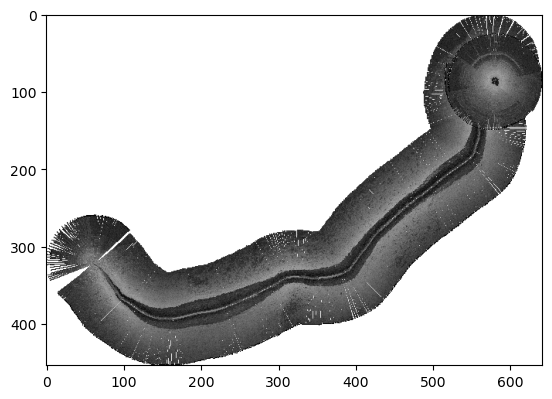

In [41]:
# Create a transparent RGBA image using Pillow
# We want transparent images.
image_data = np.zeros((height, width, 4), dtype=np.uint8)

# Assign pixel values
image_data[sidescan_y_scaled, sidescan_x_scaled, 0] = sidescan_z  # Red channel
image_data[sidescan_y_scaled, sidescan_x_scaled, 1] = sidescan_z  # Green channel
image_data[sidescan_y_scaled, sidescan_x_scaled, 2] = sidescan_z  # Blue channel
image_data[sidescan_y_scaled, sidescan_x_scaled, 3] = 255  # Alpha channel (fully opaque)

# since x y coordinate are actually starts bottom left, while image application of pixel coordinates starts from top left, we fix the orientation
image_data = np.flipud(image_data)

# Create a Pillow image from the NumPy array
image = Image.fromarray(image_data, 'RGBA')

# Save the image as PNG with transparency
image_path = "sidescan.png"
image.save(image_path, "PNG")

# Plot the image
plt.imshow(image)
plt.show()

In [23]:
# Determine the dimensions of the image based on the range of georeferenced coordinates
your_min_longitude = min(min(row) for row in sidescan_long)
your_max_longitude = max(max(row) for row in sidescan_long)
your_min_latitude = min(min(row) for row in sidescan_lat)
your_max_latitude = max(max(row) for row in sidescan_lat)

In [15]:
image = Image.new("RGBA", (width+1, height+1), (255, 255, 255, 0))
occupied = set()
for ping in range(len(scaled_sidescan_x)):
    for i, (x, y) in enumerate(zip(scaled_sidescan_x[ping], scaled_sidescan_y[ping])):
        if (x, y) in occupied:
            continue

        image.putpixel(
            (x, y), 
            (
                int(sidescan_z[ping][i]),
                int(sidescan_z[ping][i]),
                int(sidescan_z[ping][i]),
                255
            )
        )
        occupied.add((x, y))
image.save("sidescan_image2.png", "PNG")

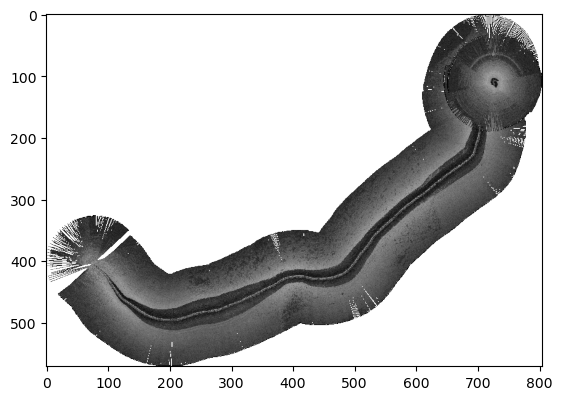

In [14]:
crs = "EPSG:4326"

# convert pillopw image to numpy array
image_data = np.flip(image, axis=0)

#img show
plt.imshow(image_data, cmap='gray')

In [12]:
import numpy as np
import rasterio
from rasterio.transform import from_bounds

# Define the pixel values and other metadata
crs = "EPSG:4326"  # Spatial reference system (e.g., WGS84)
min_lon, min_lat = your_min_longitude, your_min_latitude
max_lon, max_lat = your_max_longitude, your_max_latitude

# Define the geotransform based on the extreme longitude and latitude points
transform = from_bounds(min_lon, min_lat, max_lon, max_lat, width, height)

# Write the image data to a new GeoTIFF file
with rasterio.open(
    "output6.tif",
    "w",
    driver="GTiff",
    height=image_data.shape[0],
    width=image_data.shape[1],
    count=4,  # Number of bands (assuming a single-band image)
    dtype=image_data.dtype,  # Data type of the image (e.g., uint8)
    crs=crs,  # Spatial reference system
    transform=transform,  # Geotransform
) as dst:
    dst.write(image_data.transpose(2, 0, 1))

In [15]:
mosaic["z"].dtype

dtype('uint8')

In [41]:
data = sonar.df.query(f"survey == 'sidescan'")
dist = [np.linspace(start, stop, num = len(f)) for start, stop, f in zip(data["min_range"], data["max_range"], data["frames"])]

In [76]:
dist_stack = np.stack(dist)
sidescan_z = sonar.image("sidescan")

In [73]:
np.expand_dims(data["x"], axis=1)

array([[13413582],
       [13413582],
       [13413582],
       ...,
       [13414098],
       [13414098],
       [13414098]], dtype=int32)

In [67]:
sidescan_x = np.expand_dims(data["x"], axis=1) + dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1))

In [74]:
np.expand_dims(data["x"], axis=1) + (dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1)))

array([[13413639.08749291, 13413639.04670156, 13413639.00591021, ...,
        13413524.99408979, 13413524.95329844, 13413524.91250709],
       [13413639.63338485, 13413639.59220344, 13413639.55102203, ...,
        13413524.44897797, 13413524.40779656, 13413524.36661515],
       [13413640.08267505, 13413640.04117261, 13413639.99967016, ...,
        13413524.00032984, 13413523.95882739, 13413523.91732495],
       ...,
       [13414147.07667784, 13414147.04161055, 13414147.00654325, ...,
        13414048.99345675, 13414048.95838945, 13414048.92332216],
       [13414146.8690941 , 13414146.83417513, 13414146.79925616, ...,
        13414049.20074384, 13414049.16582487, 13414049.1309059 ],
       [13414146.67843399, 13414146.64365126, 13414146.60886853, ...,
        13414049.39113147, 13414049.35634874, 13414049.32156601]])

In [84]:
sidescan_df = pd.DataFrame({"x": sidescan_x.ravel(),
            "z": sidescan_z.ravel()})
sidescan_df

,x,z
0,1.341364e+07,44
1,1.341364e+07,42
2,1.341364e+07,31
3,1.341364e+07,33
4,1.341364e+07,29
...,...,...
11902795,1.341405e+07,2
11902796,1.341405e+07,96
11902797,1.341405e+07,91
11902798,1.341405e+07,172


In [85]:
sidescan_df["longitude"] = sonar._x2lon(sidescan_df["x"])
sidescan_df

,x,z,longitude
0,1.341364e+07,44,120.902132
1,1.341364e+07,42,120.902132
2,1.341364e+07,31,120.902131
3,1.341364e+07,33,120.902131
4,1.341364e+07,29,120.902131
...,...,...,...
11902795,1.341405e+07,2,120.905831
11902796,1.341405e+07,96,120.905831
11902797,1.341405e+07,91,120.905830
11902798,1.341405e+07,172,120.905830


In [81]:
sidescan_x.shape

(4251, 2800)

In [65]:
dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1))

array([[ 57.08749291,  57.04670156,  57.00591021, ..., -57.00591021,
        -57.04670156, -57.08749291],
       [ 57.63338485,  57.59220344,  57.55102203, ..., -57.55102203,
        -57.59220344, -57.63338485],
       [ 58.08267505,  58.04117261,  57.99967016, ..., -57.99967016,
        -58.04117261, -58.08267505],
       ...,
       [ 49.07667784,  49.04161055,  49.00654325, ..., -49.00654325,
        -49.04161055, -49.07667784],
       [ 48.8690941 ,  48.83417513,  48.79925616, ..., -48.79925616,
        -48.83417513, -48.8690941 ],
       [ 48.67843399,  48.64365126,  48.60886853, ..., -48.60886853,
        -48.64365126, -48.67843399]])

In [64]:
np.cos(np.expand_dims(data["gps_heading"], axis=1))
-60.01511765 * -0.95121855

57.08749318911241

In [58]:
dist_stack * np.cos(np.expand_dims(data["gps_heading"], axis=1))

array([[ 57.08749291,  57.04670156,  57.00591021, ..., -57.00591021,
        -57.04670156, -57.08749291],
       [ 57.63338485,  57.59220344,  57.55102203, ..., -57.55102203,
        -57.59220344, -57.63338485],
       [ 58.08267505,  58.04117261,  57.99967016, ..., -57.99967016,
        -58.04117261, -58.08267505],
       ...,
       [ 49.07667784,  49.04161055,  49.00654325, ..., -49.00654325,
        -49.04161055, -49.07667784],
       [ 48.8690941 ,  48.83417513,  48.79925616, ..., -48.79925616,
        -48.83417513, -48.8690941 ],
       [ 48.67843399,  48.64365126,  48.60886853, ..., -48.60886853,
        -48.64365126, -48.67843399]])

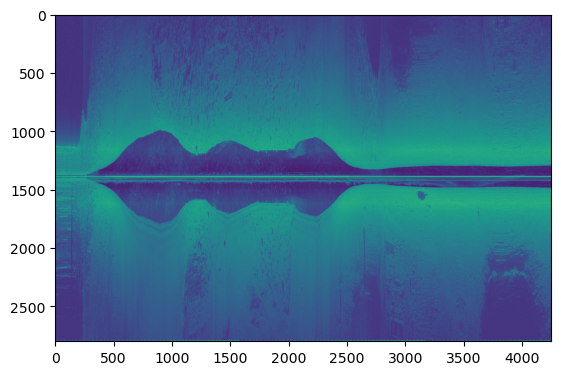

In [31]:
plt.imshow(sonar.image("sidescan").T)

In [105]:
mosaic

,x,y,z,longitude,latitude
0,1.341364e+07,1.533617e+06,44,120.902132,13.690881
1,1.341364e+07,1.533617e+06,42,120.902132,13.690880
2,1.341364e+07,1.533616e+06,31,120.902131,13.690880
3,1.341364e+07,1.533616e+06,33,120.902131,13.690880
4,1.341364e+07,1.533616e+06,29,120.902131,13.690880
...,...,...,...,...,...
11902795,1.341405e+07,1.533863e+06,2,120.905831,13.693039
11902796,1.341405e+07,1.533863e+06,96,120.905831,13.693039
11902797,1.341405e+07,1.533863e+06,91,120.905830,13.693040
11902798,1.341405e+07,1.533863e+06,172,120.905830,13.693040


/home/louis/miniconda3/envs/lowmapper/lib/python3.12/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


GeoTIFF saved to output.tif


In [9]:
sonar.water(channel="primary", pixels=3)

array([[116. ,  81.5, 159. ],
       [116. ,  82. , 157. ],
       [116. ,  80. , 149. ],
       ...,
       [216. , 130. , 194. ],
       [216. , 142. , 197. ],
       [216. , 122. , 185. ]])